In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar100
import keras.preprocessing
from skimage.io import imread, imshow, imsave
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [24]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [33]:
seed = 21
X_trainN = X_train[:5000]
y_trainN = y_train[:5000]
X_testN = X_test[:500]
y_testN = y_test[:500]

In [27]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [28]:
indexes_train = [i for i, v in enumerate(y_train) if v[13] == 1]
indexes_test = [i for i, v in enumerate(y_test) if v[13] == 1]

In [35]:
X_trainN = np.vstack((X_trainN, X_train[indexes_train]))
X_testN = np.vstack((X_testN, X_test[indexes_test]))
y_trainN = np.vstack((y_trainN, y_train[indexes_train]))
y_testN = np.vstack((y_testN, y_test[indexes_test]))

In [36]:
fo = open('label.labels.txt','r')
labels = []
for i in fo:
    labels.append(i[:len(i)-1])
#print(labels[45])

Sequential - это последовательная модель нейронной сети, от того в какой последовательности мы задаем слои, будет зависеть порядок обработки данных. 

Слой Dense - полносвязный слой, в котором можно указать количество узлов (нейронов), тип активации.

Слой Conv2D подобен Dense слою, содержит веса и смещения, которые подвергаются оптимизации. 

Dropout решает проблему переобучения, посредством отключения нейронов с вероятностью поданной на входе. Таким образом происходит ускорение обучения и повышается точность за счет усреднения значений.

MaxPooling2D - усредняет значений фильтров. Обязателен после сверточных слоев.

BatchNormalization - усредняет входящие данные (вычитает среднее и делит на стандартное отклонение). Это ускоряет тренировку нейросети.

Flatten - преобразует формат изображений из 2D массива в 1D массив для перехода к Dense слоям.

In [37]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(num_classes))
model.add(Activation('softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.










Compile - создание модели. 

Optimizer - способ изменения весов на основе полученных данных и функции потери.

Metrics - метрики, используются для контроля за этапами обучения и тестирования.

Loss - функция потери, измеряет насколько точная модель во время обучения.

Epoch - количество эпох.

In [38]:
epochs = 20
optimizer = 'Adam'
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Обучение модели нейронной сети требует следующих шагов:


1. Подача данных обучения модели (в этом примере — массивы train_images и train_labels)


2. Модель учится ассоциировать изображения и метки


3. Мы просим модель сделать прогнозы о тестовом наборе (в этом примере — массив test_images). Мы проверяем соответствие прогнозов меток из массива меток (в этом примере — массив test_labels)

In [39]:
model.fit(X_trainN, y_trainN, validation_data=(X_testN, y_testN), epochs=epochs, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5500 samples, validate on 600 samples
Epoch 1/20
5500/5500 [==============================] - 71s 13ms/step - loss: 4.5014 - acc: 0.0740 - val_loss: 4.3648 - val_acc: 0.0883
Epoch 2/20
5500/5500 [==============================] - 62s 11ms/step - loss: 3.9009 - acc: 0.1438 - val_loss: 4.0009 - val_acc: 0.1550
Epoch 3/20
5500/5500 [==============================] - 62s 11ms/step - loss: 3.6137 - acc: 0.1815 - val_loss: 3.5034 - val_acc: 0.2333
Epoch 4/20
5500/5500 [==============================] - 61s 11ms/step - loss: 3.4021 - acc: 0.2087 - val_loss: 3.8615 - val_acc: 0.1633
Epoch 5/20
5500/5500 [==============================] - 62s 11ms/step - loss: 3.2262 - acc: 0.2362 - val_loss: 3.4336 - val_acc: 0.2383
Epoch 6/20
5500/5500 [==============================] - 62s 11ms/step - loss: 3.0344 - acc: 0.2653 - val_loss: 3.1646 - val_acc: 0.2667
Epoch 7/20
5500/5500 [===================

In [40]:
model.save('bus1.h5')

In [41]:
def bus_predict(model, image_file):
    img = keras.preprocessing.image.load_img(image_file, target_size=(32, 32))   
    img_arr = numpy.expand_dims(img, axis=0)
    result = model.predict_classes(img_arr)
    #imshow(img_arr[0])
    #print(result)
    y_pred_test = model.predict_proba(X_testN)
    acc = np.max(y_pred_test, axis=1)
    label = ['Bus', 'Other']
    if result == 13:
        print("Result: {} \nScore {:.3}".format (label[0], acc[result[0]]))
    else:
        print("Result: {} \nScore {:.3}".format (label[1], acc[result[0]]))

In [42]:
saveModel = tf.keras.models.load_model('bus1.h5')

Result: Bus 
Score 0.704


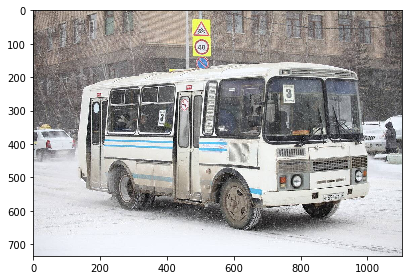

In [51]:
image = 'tbus.jpg'
bus_predict(saveModel, image)
imshow(image)

Result: Bus 
Score 0.704


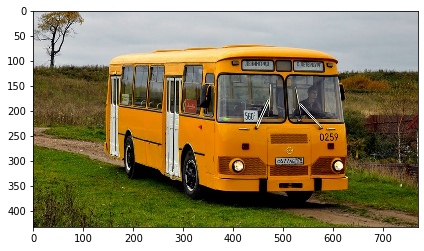

In [52]:
image = 'bus.jpg'
bus_predict(saveModel, image)
imshow(image)

Result: Bus 
Score 0.704


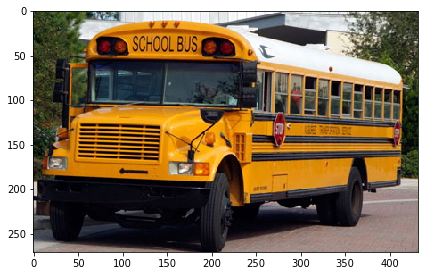

In [53]:
image = 'ybus.jpg'
bus_predict(saveModel, image)
imshow(image)

Result: Other 
Score 0.701


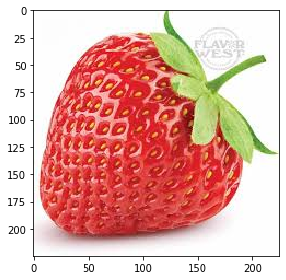

In [54]:
image = 'straw.jpg'
bus_predict(saveModel, image)
imshow(image)

Result: Other 
Score 0.205


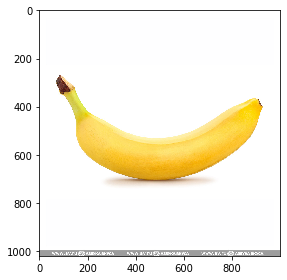

In [55]:
image = 'banana.jpg'
bus_predict(saveModel, image)
imshow(image)

Result: Other 
Score 0.392


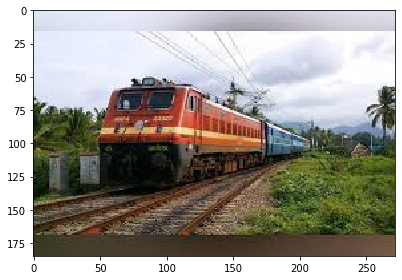

In [56]:
image = 'train.jpg'
bus_predict(saveModel, image)
imshow(image)

Result: Other 
Score 0.291


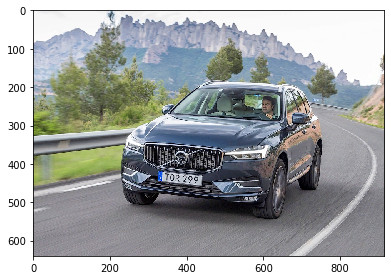

In [57]:
image = 'auto.jpg'
bus_predict(saveModel, image)
imshow(image)